# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.7.1'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Peru Data Repository (2019), https://github.com/
COVID-19 Peru Data Repository (2020), https://github.com/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Peru Data Repository (2019), https://github.com/
COVID-19 Peru Data Repository (2020), https://github.com/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
184531,2020-08-17,14,5.0,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
184532,2020-08-18,14,5.0,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
184533,2020-08-19,14,5.0,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
184534,2020-08-20,14,5.0,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
184535,2020-08-21,14,5.0,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
184531,2020-08-17,Colombia,Vichada,14,9,0,5
184532,2020-08-18,Colombia,Vichada,14,9,0,5
184533,2020-08-19,Colombia,Vichada,14,9,0,5
184534,2020-08-20,Colombia,Vichada,14,9,0,5
184535,2020-08-21,Colombia,Vichada,14,9,0,5


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
151,2020-08-17,17875,3775,341,13759
152,2020-08-18,18082,3723,344,14015
153,2020-08-19,18268,3521,347,14400
154,2020-08-20,18607,3447,348,14812
155,2020-08-21,18865,3703,350,14812


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-08-17,21879055,7285449,775909,13817697,0.017732,0.315775,0.053168
2020-08-18,22129476,7302902,782689,14043885,0.017684,0.317312,0.052790
2020-08-19,22396901,7346173,789230,14261498,0.017619,0.318381,0.052438
2020-08-20,22641288,7384439,794870,14461979,0.017554,0.319372,0.052099
2020-08-21,22642363,7430580,794888,14416895,0.017553,0.318361,0.052255


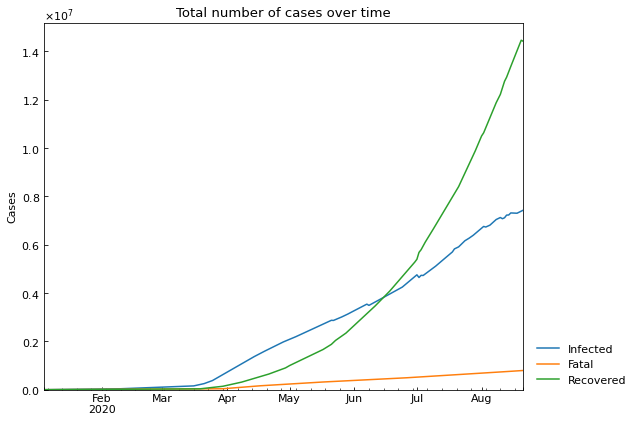

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
190,2020-08-17,56783,14481,1118,41184
191,2020-08-18,57702,14294,1134,42274
192,2020-08-19,58772,13804,1148,43820
193,2020-08-20,59956,13546,1159,45251
194,2020-08-21,60988,59814,1174,44607


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
188,2020-08-17,55667,13372,1099,41196
189,2020-08-18,56685,13286,1115,42284
190,2020-08-19,57550,12587,1128,43835
191,2020-08-20,58501,12091,1144,45266
192,2020-08-21,59721,12099,1155,46467


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
184531,2020-08-17,14,5.0,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
184532,2020-08-18,14,5.0,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
184533,2020-08-19,14,5.0,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
184534,2020-08-20,14,5.0,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
184535,2020-08-21,14,5.0,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
181011,COL,Colombia,Vichada,2020-08-17,107808
181012,COL,Colombia,Vichada,2020-08-18,107808
181013,COL,Colombia,Vichada,2020-08-19,107808
181014,COL,Colombia,Vichada,2020-08-20,107808
181015,COL,Colombia,Vichada,2020-08-21,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
184531,2020-08-17,14,5.0,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
184532,2020-08-18,14,5.0,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
184533,2020-08-19,14,5.0,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
184534,2020-08-20,14,5.0,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
184535,2020-08-21,14,5.0,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
184531,2020-08-17,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
184532,2020-08-18,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
184533,2020-08-19,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
184534,2020-08-20,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
184535,2020-08-21,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
226,2020-08-17,1,1,1,0,0,1,1,3,2,2,1,30.56
227,2020-08-18,1,1,1,0,0,1,1,3,2,2,1,30.56
228,2020-08-19,1,1,1,0,0,1,1,3,2,2,1,30.56
229,2020-08-20,1,1,1,0,0,1,1,3,2,2,1,30.56
230,2020-08-21,1,1,1,0,0,1,1,3,2,2,1,30.56


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
226,2020-08-17,1,1,1,0,0,1,1,3,2,2,1,30.56
227,2020-08-18,1,1,1,0,0,1,1,3,2,2,1,30.56
228,2020-08-19,1,1,1,0,0,1,1,3,2,2,1,30.56
229,2020-08-20,1,1,1,0,0,1,1,3,2,2,1,30.56
230,2020-08-21,1,1,1,0,0,1,1,3,2,2,1,30.56


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

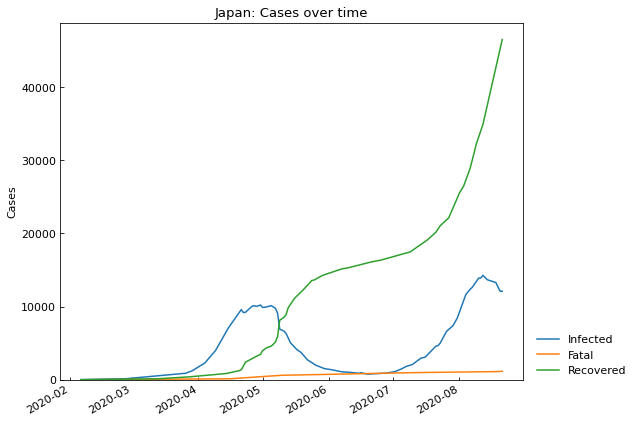

,Date,Confirmed,Infected,Fatal,Recovered
188,2020-08-17,55667,13372,1099,41196
189,2020-08-18,56685,13286,1115,42284
190,2020-08-19,57550,12587,1128,43835
191,2020-08-20,58501,12091,1144,45266
192,2020-08-21,59721,12099,1155,46467


In [26]:
import matplotlib
warnings.simplefilter("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

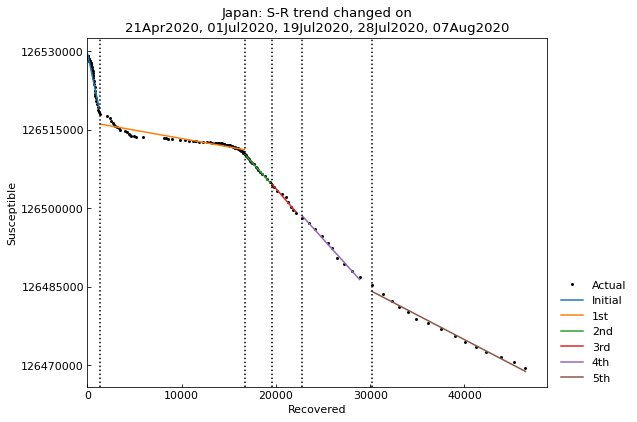

,Type,Start,End,Population
1st,Past,21Apr2020,30Jun2020,126529100
2nd,Past,01Jul2020,18Jul2020,126529100
3rd,Past,19Jul2020,27Jul2020,126529100
4th,Past,28Jul2020,06Aug2020,126529100
5th,Past,07Aug2020,21Aug2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	5th phase (07Aug2020 - 21Aug2020): finished 1750 trials in 1 min  0 sec

	4th phase (28Jul2020 - 06Aug2020): finished  689 trials in 0 min 15 sec

	3rd phase (19Jul2020 - 27Jul2020): finished  876 trials in 0 min 20 sec

	1st phase (21Apr2020 - 30Jun2020): finished 2008 trials in 1 min  0 sec

	2nd phase (01Jul2020 - 18Jul2020): finished 2080 trials in 1 min  0 sec

Completed optimization. Total: 2 min  1 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/gamma [day],1/alpha2 [day],alpha1 [-],1/beta [day],RMSLE,Trials,Runtime
1st,Past,21Apr2020,30Jun2020,126529100,SIR-F,0.39,0.115648,0.000073,0.015403,0.034865,720,14,6820,0.116,32,0.747923,2008,1 min 0 sec
2nd,Past,01Jul2020,18Jul2020,126529100,SIR-F,2.12,0.000476,0.000139,0.075681,0.035547,720,14,3587,0.000,6,0.047998,2080,1 min 0 sec
3rd,Past,19Jul2020,27Jul2020,126529100,SIR-F,2.09,0.001255,0.000046,0.061928,0.029491,720,16,10923,0.001,8,0.021583,876,0 min 20 sec
4th,Past,28Jul2020,06Aug2020,126529100,SIR-F,1.81,0.000086,0.000145,0.068919,0.037919,720,13,3457,0.000,7,0.025316,689,0 min 15 sec
5th,Past,07Aug2020,21Aug2020,126529100,SIR-F,1.08,0.000066,0.000244,0.044819,0.041280,720,12,2053,0.000,11,0.058447,1750,1 min 0 sec


### Accuracy of estimation

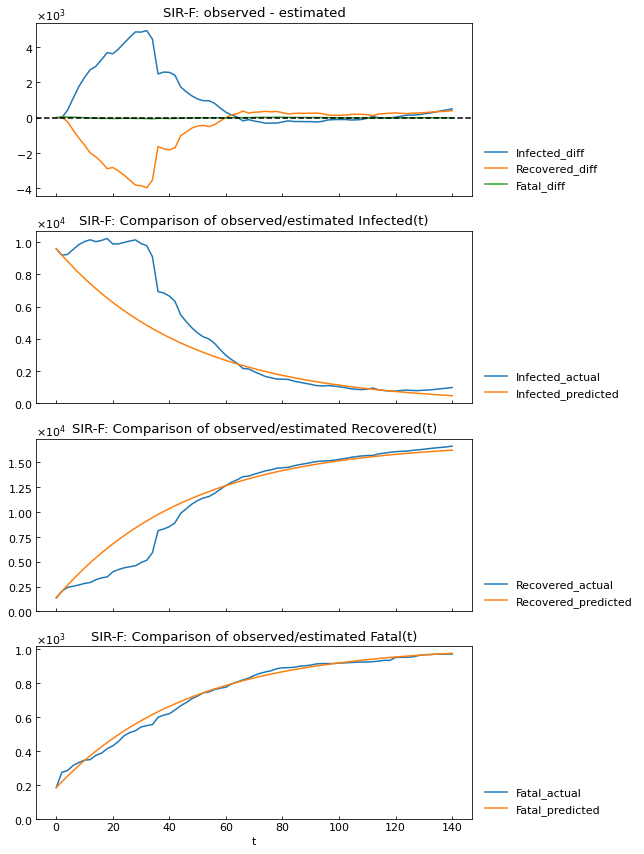

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

1.81

### Show parameter history

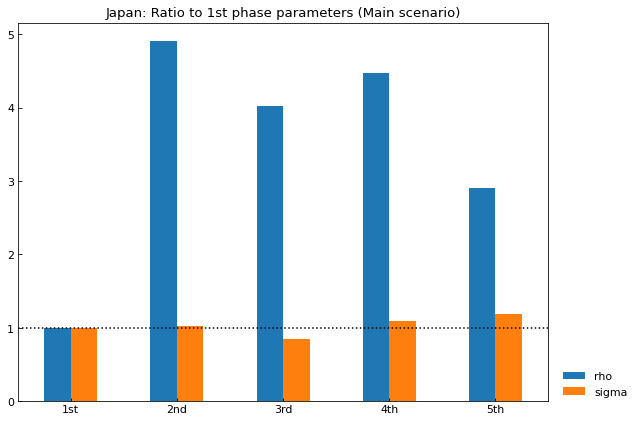

,1st,2nd,3rd,4th,5th
rho,1.0,4.913539,4.020619,4.474554,2.909837
sigma,1.0,1.019552,0.845879,1.087610,1.184005


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

### Show the history of reproduction number

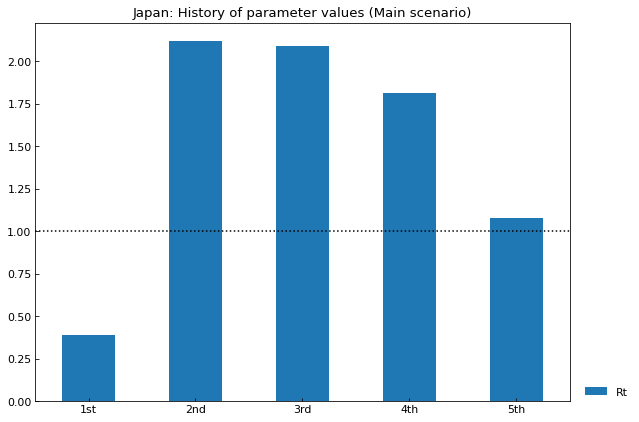

,1st,2nd,3rd,4th,5th
Rt,0.39,2.12,2.09,1.81,1.08


In [33]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

### Simulate the number of cases

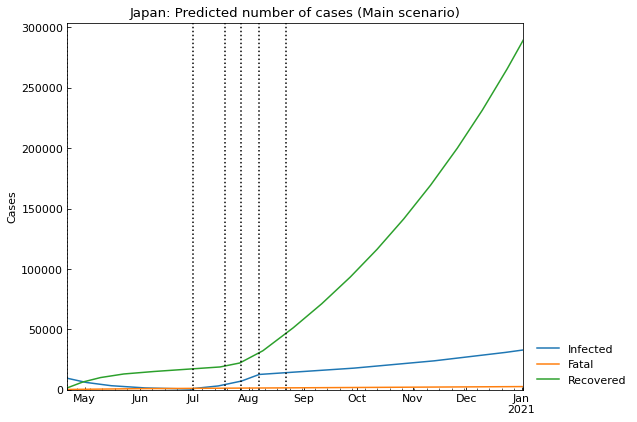

,Date,Confirmed,Fatal,Infected,Recovered
252,2020-12-29,313329,2517,32073,278739
253,2020-12-30,316207,2533,32278,281396
254,2020-12-31,319102,2549,32484,284069
255,2021-01-01,322015,2565,32691,286759
256,2021-01-02,324947,2581,32899,289467


In [34]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [35]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.04128020477040788

In [36]:
sigma_new = sigma_current * 2
sigma_new

0.08256040954081575

In [37]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     1st      Past  21Apr2020  30Jun2020   126529100  SIR-F  0.39   
         2nd      Past  01Jul2020  18Jul2020   126529100  SIR-F  2.12   
         3rd      Past  19Jul2020  27Jul2020   126529100  SIR-F  2.09   
         4th      Past  28Jul2020  06Aug2020   126529100  SIR-F  1.81   
         5th      Past  07Aug2020  21Aug2020   126529100  SIR-F  1.08   
         6th    Future  22Aug2020  01Jan2021   126529100  SIR-F  1.08   
Medicine 1st      Past  21Apr2020  30Jun2020   126529100  SIR-F  0.39   
         2nd      Past  01Jul2020  18Jul2020   126529100  SIR-F  2.12   
         3rd      Past  19Jul2020  27Jul2020   126529100  SIR-F  2.09   
         4th      Past  28Jul2020  06Aug2020   126529100  SIR-F  1.81   
         5th      Past  07Aug2020  21Aug2020   126529100  SIR-F  1.08   
         6th    Future  22Aug2020  21Sep2020   126529100  SIR-F  1.08   
         7th    Future  22Sep2020  01Jan2021   126529100  SIR-F  0.54   

                   theta     kappa       rho     sigma  tau  1/gamma [day]  \
Scenario Phase                                                               
Main     1st    0.115648  0.000073  0.015403  0.034865  720             14   
         2nd    0.000476  0.000139  0.075681  0.035547  720             14   
         3rd    0.001255  0.000046  0.061928  0.029491  720             16   
         4th    0.000086  0.000145  0.068919  0.037919  720             13   
         5th    0.000066  0.000244  0.044819  0.041280  720             12   
         6th    0.000066  0.000244  0.044819  0.041280  720             12   
Medicine 1st    0.115648  0.000073  0.015403  0.034865  720             14   
         2nd    0.000476  0.000139  0.075681  0.035547  720             14   
         3rd    0.001255  0.000046  0.061928  0.029491  720             16   
         4th    0.000086  0.000145  0.068919  0.037919  720             13   
         5th    0.000066  0.000244  0.044819  0.041280  720             12   
         6th    0.000066  0.000244  0.044819  0.041280  720             12   
         7th    0.000066  0.000244  0.044819  0.082560  720              6   

                1/alpha2 [day]  alpha1 [-]  1/beta [day]      RMSLE Trials  \
Scenario Phase                                                               
Main     1st              6820       0.116            32   0.747923   2008   
         2nd              3587       0.000             6  0.0479979   2080   
         3rd             10923       0.001             8  0.0215829    876   
         4th              3457       0.000             7  0.0253165    689   
         5th              2053       0.000            11  0.0584473   1750   
         6th              2053       0.000            11          -      -   
Medicine 1st              6820       0.116            32   0.747923   2008   
         2nd              3587       0.000             6  0.0479979   2080   
         3rd             10923       0.001             8  0.0215829    876   
         4th              3457       0.000             7  0.0253165    689   
         5th              2053       0.000            11  0.0584473   1750   
         6th              2053       0.000            11          -      -   
         7th              2053       0.000            11          -      -   

                     Runtime  
Scenario Phase                
Main     1st    1 min  0 sec  
         2nd    1 min  0 sec  
         3rd    0 min 20 sec  
         4th    0 min 15 sec  
         5th    1 min  0 sec  
         6th               -  
Medicine 1st    1 min  0 sec  
         2nd    1 min  0 sec  
         3rd    0 min 20 sec  
         4th    0 min 15 sec  
         5th    1 min  0 sec  
         6th               -  
         7th               -

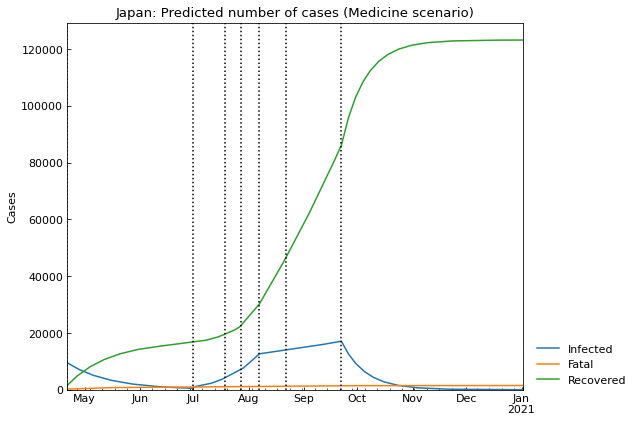

,Date,Confirmed,Fatal,Infected,Recovered
252,2020-12-29,124604,1477,10,123117
253,2020-12-30,124605,1477,9,123119
254,2020-12-31,124606,1477,9,123120
255,2021-01-01,124606,1477,8,123121
256,2021-01-02,124607,1477,7,123123


In [38]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [39]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 02Jan2021,Fatal on 02Jan2021,7th_Rt
Main,32899,02Jan2021,32899,2581,-
Medicine,17056,22Sep2020,7,1477,0.54
